In [41]:
import os, sys

# 3rd Party imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

 # Custom Module Imports
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'zecmip_stabilisation'))
import constants
sys.path.append(constants.MODULE_DIR)
import open_zecmip
import utils
# import signal_to_noise as sn
import plotting_functions
import xarray_extender as xe
import zec_calculation_functions
import signal_to_noise_calculations as sn_calc

# import drift_functions
import sn_plotting
import my_stats

In [10]:
xr.set_options(display_expand_attrs=False)

In [2]:
# Define the path to the directory containing the data
PATH = '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/esm-1pct-brch-1000PgC/r1i1p1f2/Amon'

In [3]:
RSUT_PATH = os.path.join(PATH,'rsut', 'gn', 'v20200622')#, '*.nc')
os.listdir(RSUT_PATH)

['rsut_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_191301-211212.nc',
 'rsut_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_211301-216012.nc']

In [12]:
RLUT_PATH = os.path.join(PATH,'rlut', 'gn', 'v20200622')#, '*.nc')
os.listdir(RLUT_PATH)

['rlut_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_191301-211212.nc',
 'rlut_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_211301-216012.nc']

In [15]:
RSDT_PATH = os.path.join(PATH,'rsdt', 'gn', 'v20200622')#, '*.nc')
os.listdir(RSDT_PATH)

['rsdt_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_211301-216012.nc',
 'rsdt_Amon_MIROC-ES2L_esm-1pct-brch-1000PgC_r1i1p1f2_gn_191301-211212.nc']

In [22]:
rsut_ds = xr.open_mfdataset(os.path.join(RSUT_PATH, '*.nc'))['rsut'].compute()
rlut_ds = xr.open_mfdataset(os.path.join(RLUT_PATH, '*.nc'))['rlut'].compute()
rsdt_ds = xr.open_mfdataset(os.path.join(RSDT_PATH, '*.nc'))['rsdt'].compute()

In [27]:
# Calculate TOA Energy Imbalance
toa_energy_imbalance_ds = rsdt_ds - (rsut_ds + rlut_ds)
#Resample from monthly to yearly via mean
toa_energy_imbalance_yearly_ds = toa_energy_imbalance_ds.resample(time='YE').mean()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'


In [38]:
toa_smean_ds = my_stats.space_mean(toa_energy_imbalance_yearly_ds)

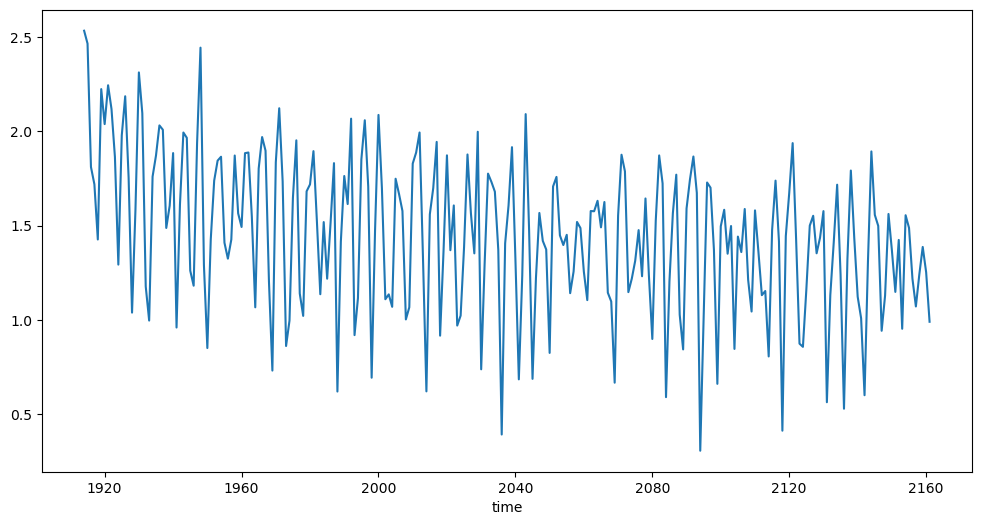

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
toa_smean_ds.plot(ax=ax)

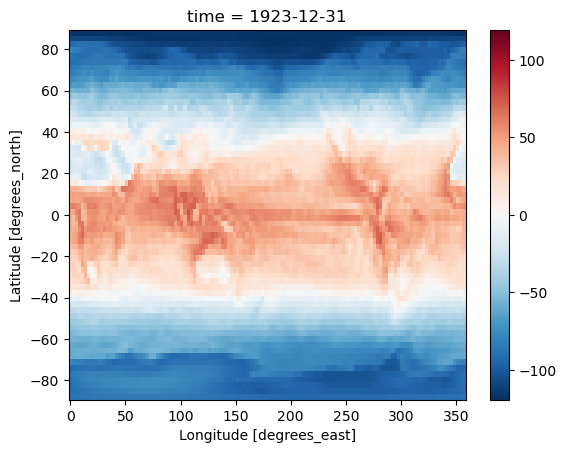

In [30]:
toa_energy_imbalance_yearly_ds.isel(time=10).plot()

In [44]:
THETAO_PATH = os.path.join(PATH,'thetao', 'gn', 'v20200622')#, '*.nc')
os.listdir(THETAO_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/thetao/gn/v20200622'

In [ ]:

# Optionally, save the results to a new netCDF file
# toa_energy_imbalance.to_netcdf(f'{PATH}/toa_energy_imbalance.nc')

# Load the datasets for ocean potential temperature
thetao = xr.open_mfdataset(f'{PATH}/thetao/*.nc')['thetao']  # Ocean potential temperature

# Constants for ocean heat content calculation
rho = 1026  # Density of seawater in kg/m^3
cp = 3985   # Specific heat capacity of seawater in J/(kg·K)

# Load grid cell thicknesses and areas if available
dz = xr.open_mfdataset(f'{PATH}/dz/*.nc')['dz']       # Depth thickness
area = xr.open_mfdataset(f'{PATH}/area/*.nc')['area']  # Grid cell area

# Compute change in ocean heat content over time
delta_thetao = thetao.diff(dim='time')

# Calculate heat content change
heat_content_change = rho * cp * delta_thetao * dz * area

# Sum over all grid cells and depths
ocean_heat_uptake = heat_content_change.sum(dim=['depth', 'lat', 'lon'])

In [ ]:





# Display the Ocean Heat Uptake
print(ocean_heat_uptake)

# Optionally, save the results to a new netCDF file
ocean_heat_uptake.to_netcdf(f'{PATH}/ocean_heat_uptake.nc')
